In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set
measurement_path = "./Resources/hawaii_measurements.csv"
measurement_data = pd.read_csv(measurement_path, encoding="utf-8")
measurement_data = pd.DataFrame(measurement_data)
measurement_data
#the most recent data is the last value that appears

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,NaN,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.50,76


2016-08-23


<AxesSubplot:xlabel='date'>

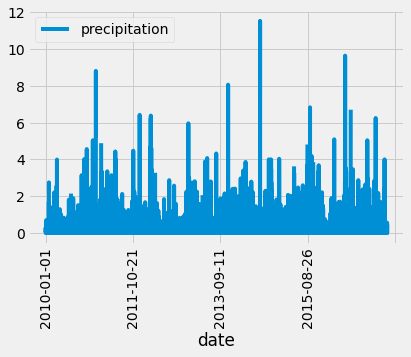

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

year_past = dt.date(2017, 8, 23) - dt.timedelta(365)
print(year_past)
# Perform a query to retrieve the date and precipitation scores
result = session.query(measurement.date, measurement.prcp).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(result, columns=['date', 'precipitation'])
measurement_df.head()
measurement_df.set_index('date')
# Sort the dataframe by date
measurement_df = measurement_df.sort_values(by=['date'])
measurement_df = measurement_df.set_index('date')
# Use Pandas Plotting with Matplotlib to plot the data

measurement_df.plot(rot=90)


In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [53]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
results = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = results[0][0]
session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                filter(measurement.station == active_station).all()

[(54.0, 71.66378066378067, 85.0)]

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
5,USC00519281,73.0
6,USC00519281,78.0
7,USC00519281,77.0
8,USC00519281,78.0
9,USC00519281,80.0


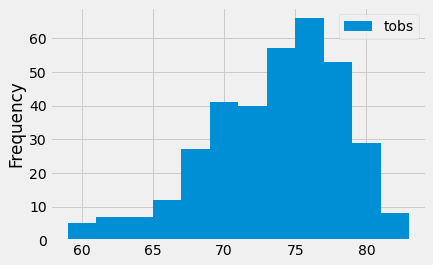

In [78]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as df
year_results = df.date(2017, 8, 23) - dt.timedelta(days=365)
last_year = session.query(measurement.station,measurement.tobs).\
            filter(measurement.station == active_station).\
            filter(measurement.date >= year_results).all()
last_year_df = pd.DataFrame(last_year, columns = ['station', 'tobs'])

last_year_df.plot.hist(bins=12)
last_year_df.head(10)

# Close session

In [16]:
# Close Session
session.close()